# Check Space-time Segment Conflict

In [3]:
import sys
sys.path.append('../')

import numpy as np
from matplotlib import pyplot as plt

import shapely
from shapely.plotting import plot_polygon, plot_line

from panav.util import unique_tx, interpolate_positions,unit_cube
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Derivation of segment-wise conflict check algorithm

Implemented in 
```python
panav.PBS.conflict import seg_conflict
```

Input: two space-time segments, $(t_1,p_1)-(t_2,p_2),(\tau_1,q_1)-(\tau_2,q_2)$. Bloating radii of the segments, $r_a,r_b$.
1. Check if the time intervals overlap.
    If $t_1>\tau_2$ or $t_2<\tau_1$, return no conflict.
    Otherwise, continue.

2. Consider the spatial distance between the these two segments, as a function of time.
$$
    d(t) = ||p_1+ \frac{t-t_1}{t_2-t_1}(p_2-p_1) - (q_1+ \frac{t-\tau_1}{\tau_2-\tau_1}(q_2-q_1))||
$$

Let $t^* = \arg\min_{t\in \mathbb{R}} d(t)$. By taking the derivative of $d(t)$ and setting it to zero, we have 
$$t^* = - \frac{v^\top u}{||v||^2}$$
where $$ v = v_a-v_b, u = p_1-q_1 - (v_a t_1-v_b \tau_1)\\ v_a = \frac{p_2-p_1}{t_2-t_1},v_b=\frac{q_2-q_1}{\tau_2-\tau_1} $$
 
Let $lb,ub = \max(t_1,\tau_1),\min(t_2,\tau_2)$. 

Then if $$lb\leq t^* \leq ub$$, there is a conflict if $$d(t^*)\leq r_a+r_b$$. 

Otherwise, there is a conflict if $$\min(d(lb),d(ub))\leq r_a+r_b$$

In [6]:
from panav.PBS.conflict import seg_conflict

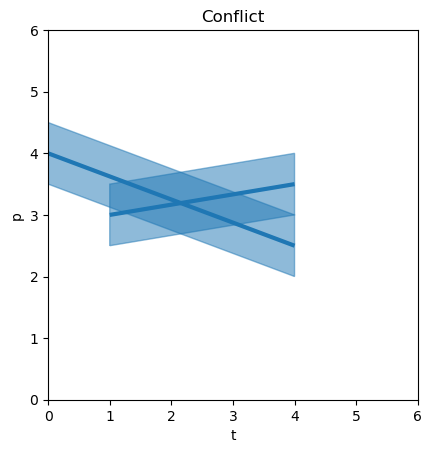

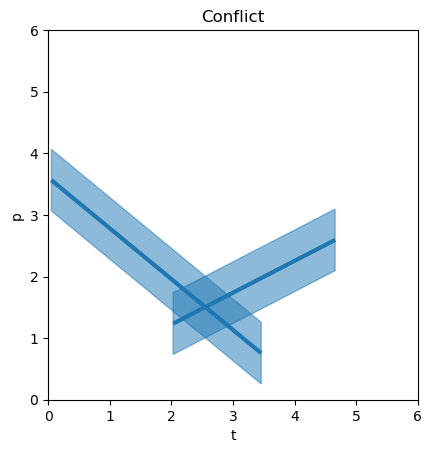

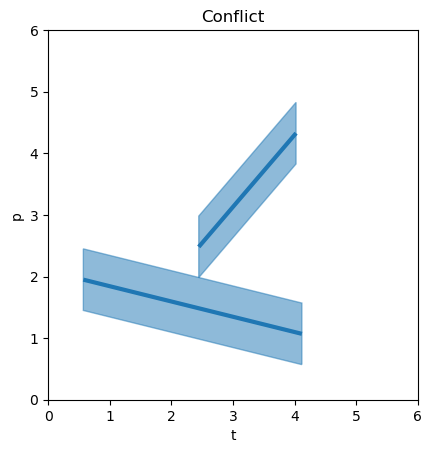

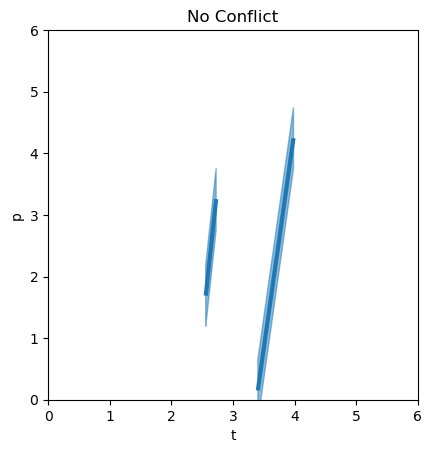

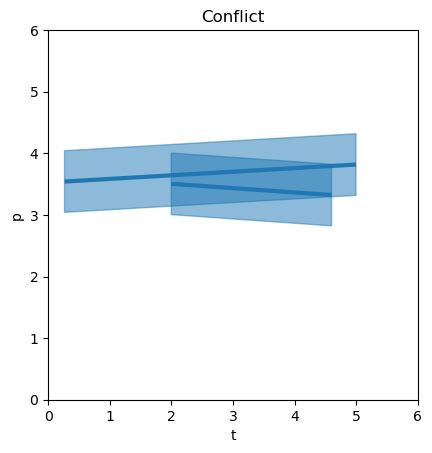

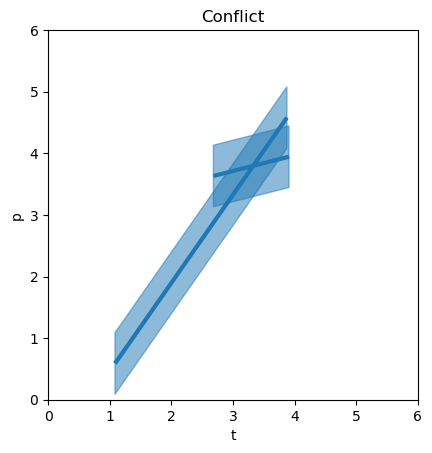

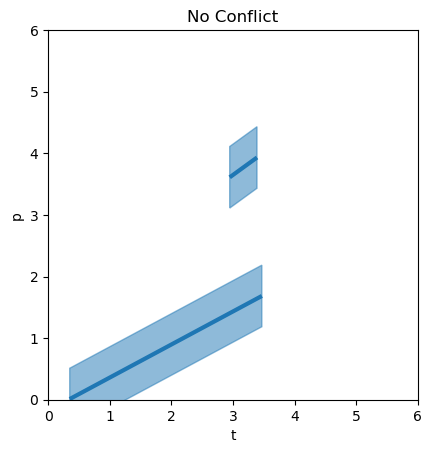

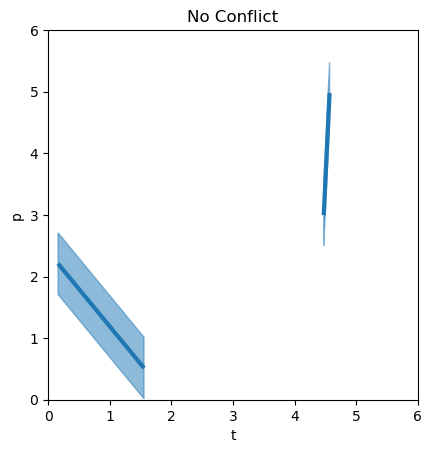

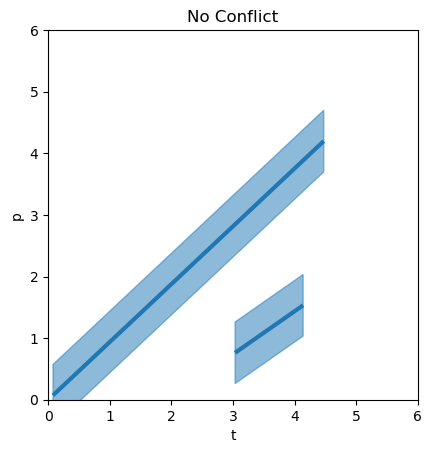

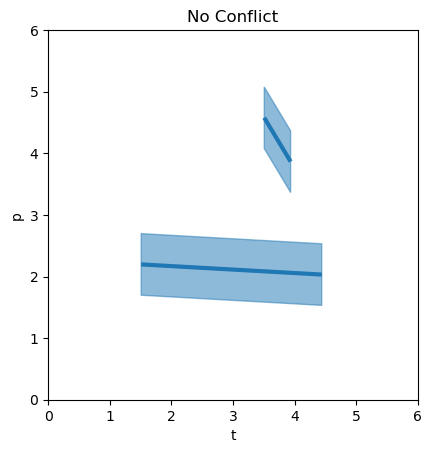

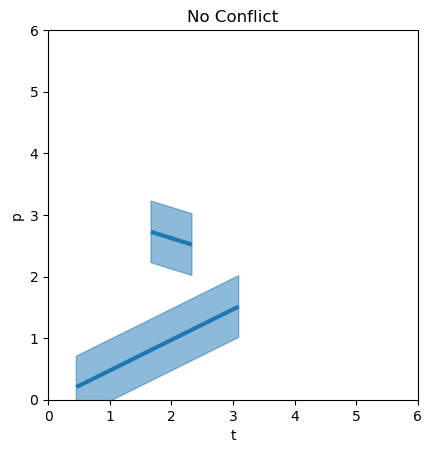

In [7]:
N = 10
tas  = [np.array([1,4])]\
        +[np.sort(np.random.uniform(0,5,2)) for _  in range(N)]

pas = [np.array([[3,3.5]])]\
        +[np.random.uniform(0,5,(1,2)) for _ in range(N)]

tbs = [np.array([0,4])]\
        +[np.sort(np.random.uniform(0,5,2)) for _  in range(N)]
pbs = [np.array([[4,2.5]])]\
        +[np.random.uniform(0,5,(1,2)) for _ in range(N)]

d = 1
bloating_r = 0.5

xlim = (0,6)
ylim = (0,6)

for ta,tb,pa,pb in zip(tas,tbs,pas,pbs):
    
    ax = plt.gca()

    segments = [np.vstack([ta,pa]),
                np.vstack([tb,pb])]

    for seg in segments:
        line = shapely.geometry.LineString(seg.T)
        t = seg[0,:]
        p = seg[1:,:]

        tube_vertices = [(t[i],p[:,i]+bloating_r*unit_vec) 
                         for i in range(len(t))
                          for unit_vec in unit_cube(d)]


        plot_line(line, ax=ax, add_points=False, linewidth=3)
        plot_polygon(shapely.convex_hull(shapely.MultiPoint(tube_vertices)), ax=ax, add_points=False, alpha=0.5)

    conflict = seg_conflict(ta,pa,tb,pb,bloating_r,bloating_r)

    title = 'Conflict' if conflict else 'No Conflict'

    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel('t')
    ax.set_ylabel('p')
    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()